**C) predict whether the picture is one of food or the interior**


**STEP 1: Manually labeled 25,000 images as being Food or NonFood, 20,000 used to train the CNN, 5,000 are used as test set.**

Import Keras and scikit-learn in order to train our CNN:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
!pip install scikit-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Ensure Google colab can access google drive where our labeled training and test set are stored, by mounting the drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**STEP 2: Building and training the initial model**: (model1)

Load the VGG16 model, a pre trained model:

In [ ]:
from tensorflow.keras.applications import VGG16

input_shape = (224, 224, 3)
base_model = VGG16(weights='imagenet', input_shape=input_shape, include_top=False)



58889256/58889256 [==============================] - 0s 0us/step


Add a custom output layer:


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

input_shape = (224, 224, 3)
base_model = VGG16(weights='imagenet', input_shape=input_shape, include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

Freeze the pre-trained layers:

In [ ]:
for layer in base_model.layers:
    layer.trainable = False


Train the first basic model for a first time on 20,000 labeled images:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# define the data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Training',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Training',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        subset='validation')

# define and compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 2
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)



KeyboardInterrupt: ignored

Save the weights to a file on our Google Drive: 

In [ ]:
# Save the weights to a file on your Google Drive
model.save_weights('/content/drive/MyDrive/CNN_weights/model1_weights_2epochs.h5')

**STEP 3: Optimizing the model’s performance through regularization and finetuning** (model2)

LEARNING RATE:
(*Adam uses a standard leaning rate of 0.001*

In [ ]:
from tensorflow.keras.optimizers import Adam

lr = 0.0001 # your desired learning rate
optimizer = Adam(learning_rate=lr)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


NameError: ignored

Train the second model with regularization and finetuned hyperparameters on our 20,000 labeled images:


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# define the data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# define and compile the model with dropout, batch normalization and L1/L2 regularization
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3),
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model with dropout, batch normalization and L1/L2 regularization
epochs = 10
history = model2.fit(train_generator, epochs=epochs, validation_data=validation_generator)



Found 16031 images belonging to 2 classes.
Found 4007 images belonging to 2 classes.
Epoch 1/10
  2/501 [..............................] - ETA: 1:15:25 - loss: 50.4204 - accuracy: 0.5781

KeyboardInterrupt: ignored

Save model2 weights:

In [ ]:
# Save the weights to a file on your Google Drive
model2.save_weights('/content/drive/MyDrive/CNN_weights/model2_weights_4epochs.h5')

**STEP 4: Applying learnings from STEP2 and STEP 3** (model3)




Train the third model with only drop out as regularization method:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# define the data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# define and compile the model with dropout regularization
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model with dropout regularization
epochs = 6
history = model3.fit(train_generator, epochs=epochs, validation_data=validation_generator)


Found 16031 images belonging to 2 classes.
Found 4007 images belonging to 2 classes.
Epoch 1/6
  8/501 [..............................] - ETA: 1:20:51 - loss: 0.9647 - accuracy: 0.6133

KeyboardInterrupt: ignored

Save model3 weights:

In [ ]:
# Save the weights to a file on your Google Drive
model3.save_weights('/content/drive/MyDrive/CNN_weights/model3_weights_6epochs.h5')

**Testing** (5000 images)

Gives the accuracy and loss on the test set of 5000 images

In [ ]:
##
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# define and compile the model with dropout regularization
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
##

# Load the saved model architecture
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Load the saved weights
model.load_weights('/content/drive/MyDrive/CNN_weights/model3_weights_6epochs.h5')

# Create a test data generator 
test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/content/drive/MyDrive/Test'
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)
print('Test Loss:', test_loss)

Found 5000 images belonging to 2 classes.
157/157 [==============================] - 169s 1s/step - loss: 0.1340 - accuracy: 0.9676
Test accuracy: 0.9675999879837036
Test Loss: 0.13396267592906952


Gives 10 images with highest probability of being non food and 10 images with lowest probability to be non food (=food)

In [ ]:
import numpy as np

# Load the saved model architecture
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Load the saved weights
model.load_weights('/content/drive/MyDrive/CNN_weights/model3_weights_6epochs.h5')

# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/content/drive/MyDrive/Test'
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        shuffle=False)  # Disable shuffling to maintain order

# Make predictions on the test set
predictions = model.predict(test_generator)

# Get the filenames from the test set
filenames = test_generator.filenames

# Get the indices of the top 10 highest and lowest probabilities
top_10_indices = np.argsort(predictions.flatten())[-10:]
bottom_10_indices = np.argsort(predictions.flatten())[:10]

# Print the filenames and probabilities for the top 10 highest probabilities
print("Top 10 highest probabilities:")
for idx in top_10_indices:
    print("Filename: {}, Probability: {}".format(filenames[idx], predictions[idx]))

# Print the filenames and probabilities for the top 10 lowest probabilities
print("Top 10 lowest probabilities:")
for idx in bottom_10_indices:
    print("Filename: {}, Probability: {}".format(filenames[idx], predictions[idx]))


Found 5000 images belonging to 2 classes.
157/157 [==============================] - 168s 1s/step
Top 10 highest probabilities:
Filename: TestNonF/356644.jpg, Probability: [0.9999989]
Filename: TestNonF/235056.jpg, Probability: [0.99999905]
Filename: TestNonF/254174.jpg, Probability: [0.99999905]
Filename: TestNonF/308416.jpg, Probability: [0.99999917]
Filename: TestNonF/294510.jpg, Probability: [0.9999992]
Filename: TestNonF/256722.jpg, Probability: [0.9999995]
Filename: TestNonF/215356.jpg, Probability: [0.99999976]
Filename: TestNonF/285745.jpg, Probability: [1.]
Filename: TestNonF/281299.jpg, Probability: [1.]
Filename: TestNonF/292110.jpg, Probability: [1.]
Top 10 lowest probabilities:
Filename: TestF/352420.jpg, Probability: [1.7794722e-30]
Filename: TestF/351596.jpg, Probability: [2.5679975e-23]
Filename: TestF/291973.jpg, Probability: [3.395924e-23]
Filename: TestF/333543.jpg, Probability: [6.213479e-23]
Filename: TestF/258697.jpg, Probability: [1.1388386e-22]
Filename: TestF/3

Gives all incorrect classifications:

In [ ]:
# Get the filenames and true labels from the test set
filenames = test_generator.filenames
true_labels = test_generator.classes

# Initialize a list to store incorrectly classified filenames
incorrect_filenames = []

# Iterate over the predictions and true labels
for filename, prediction, true_label in zip(filenames, predictions, true_labels):
    # Round the prediction to the nearest class (0 or 1)
    predicted_class = int(round(prediction[0]))

    # Check if the predicted class is different from the true label
    if predicted_class != true_label:
        incorrect_filenames.append(filename)

# Print the filenames of incorrectly classified images
print("Incorrectly Classified Images:")
for filename in incorrect_filenames:
    print(filename)

Incorrectly Classified Images:
TestF/213745.jpg
TestF/213982.jpg
TestF/214491.jpg
TestF/215003.jpg
TestF/215689.jpg
TestF/215693.jpg
TestF/215931.jpg
TestF/216018.jpg
TestF/216075.jpg
TestF/216230.jpg
TestF/232621.jpg
TestF/232623.jpg
TestF/233467.jpg
TestF/234031.jpg
TestF/234038.jpg
TestF/234060.jpg
TestF/234098.jpg
TestF/234817.jpg
TestF/235055.jpg
TestF/235057.jpg
TestF/235082.jpg
TestF/235113.jpg
TestF/241489.jpg
TestF/242061.jpg
TestF/242516.jpg
TestF/250440.jpg
TestF/250470.jpg
TestF/251466.jpg
TestF/256402.jpg
TestF/256532.jpg
TestF/256856.jpg
TestF/257559.jpg
TestF/262757.jpg
TestF/263075.jpg
TestF/263076.jpg
TestF/263275.jpg
TestF/281098.jpg
TestF/281687.jpg
TestF/282482.jpg
TestF/282610.jpg
TestF/282804.jpg
TestF/283218.jpg
TestF/283873.jpg
TestF/283929.jpg
TestF/285927.jpg
TestF/286578.jpg
TestF/286795.jpg
TestF/286797.jpg
TestF/286844.jpg
TestF/287051.jpg
TestF/287394.jpg
TestF/287593.jpg
TestF/289164.jpg
TestF/291212.jpg
TestF/291360.jpg
TestF/291629.jpg
TestF/291766.jpg


Stores these incorrectly classified images in 2 folders on my google drive:

In [ ]:
import numpy as np
import shutil
# Get the filenames and true labels from the test set
filenames = test_generator.filenames
true_labels = test_generator.classes

# Define the directory paths for storing the incorrectly classified images
incorrect_food_dir = '/content/drive/MyDrive/Incorrect/IncorrectFood'
incorrect_nonfood_dir = '/content/drive/MyDrive/Incorrect/IncorrectNonFood'

# Iterate over the predictions, true labels, and filenames
for prediction, true_label, filename in zip(predictions, true_labels, filenames):
    predicted_class = np.round(prediction).astype(int)
    
    # Check if the prediction is incorrect
    if predicted_class != true_label:
       
        # Create the destination directory path based on the predicted class
        if predicted_class == 1:
            destination_dir = incorrect_food_dir
        else:
            destination_dir = incorrect_nonfood_dir
        
        # Create the destination directory if it does not exist
        if not os.path.exists(destination_dir):
            os.makedirs(destination_dir)
        
        # Copy the incorrectly classified image to the destination directory
        source_path = os.path.join(test_dir, filename)
        destination_path = os.path.join(destination_dir, filename)
        shutil.copyfile(source_path, destination_path)

**Interpretability**

install Kers-Vis:

In [ ]:
!pip install keras-vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


model architecture diagram of model 3:

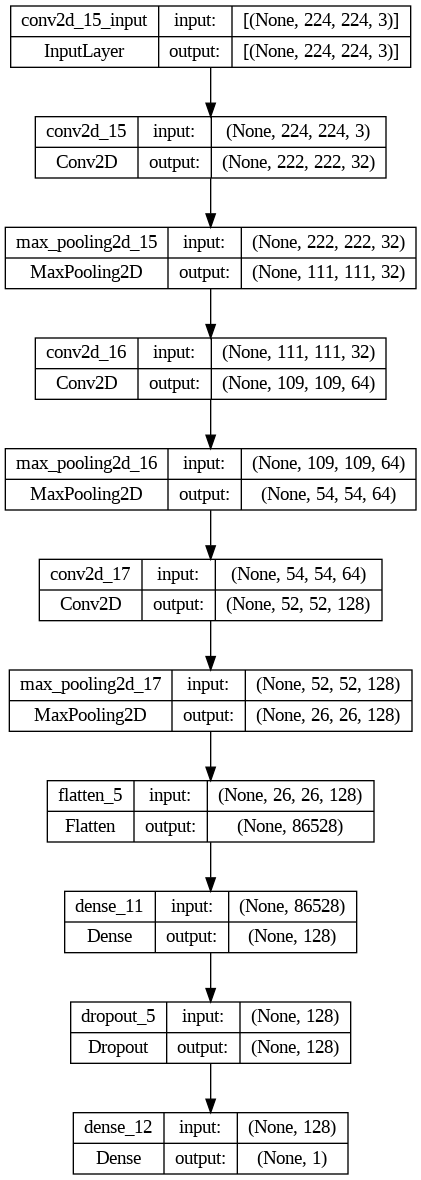

In [ ]:
from tensorflow.keras.utils import plot_model

# define and compile the model with dropout regularization
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
##

# Load the saved model architecture (delete hieronder de 3s)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Visualize the model architecture and save it to Google Drive
plot_model(model, to_file='/content/drive/MyDrive/model_architecture.png', show_shapes=True)

Visualise layer activation: /content/drive/MyDrive/CNN_weights/model3_weights_6epochs.h5

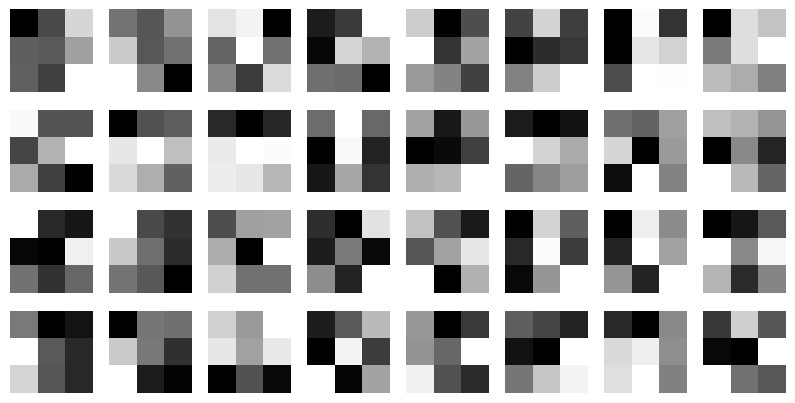

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
import numpy as np

# define and compile the model with dropout regularization
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
#

# Load the saved weights
model.load_weights('/content/drive/MyDrive/CNN_weights/model3_weights_6epochs.h5')

# Get the weights of a specific layer (e.g., the first convolutional layer)
layer_weights = model.layers[0].get_weights()[0]

# Visualize the learned weights
plt.figure(figsize=(10, 5))
for i in range(layer_weights.shape[3]):
    plt.subplot(4, 8, i+1)
    plt.imshow(layer_weights[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()


Heatmap on highest and lowest probability to be NonFood (WIP)

image_path = '/content/drive/MyDrive/Test/TestNonF/292110.jpg'

image_path = '/content/drive/MyDrive/Test/TestF/352420.jpg'